> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will be analyzing data associated with movie information. This dataset provides a comprehensive collection of movie information, encompassing various aspects from their identification to financial performance, creative credits, and audience reception. 

This dataset serves as a valuable resource for:
- Analyzing trends in the movie industry.
- Performing detailed financial analyses.
- Exploring the relationships between various attributes of movies.

Some of the questions we aim to answer with this dataset include:
- Does the budget of the movie affect the revenue?
- Which year had the highest movie revenues?


In [111]:
# I import the packages that I will use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [114]:
# load the dataset 
df = pd.read_csv('./tmdb-movies.csv')
# display the first few columns
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [115]:
# The number of rows and columns in the dataset
df.shape

(10866, 21)

**Now we know some information about the dataset, it contains 21 columns and 10866 rows**
<br>**Key Features:**
<br><li>`id` - movie id
<br><li>`imdb_id` -  unique code for movies on IMDb (Internet Movie Database)
<br><li>`popularity`- movie popularity
<br><li>`budget` - movie budget
<br><li>`revenue` - movie revenue
<br><li>`original_title` - movie original_title
<br><li>`cast` - movie cast
<br><li>`homepage` - movie homepage URL
<br><li>`director` - a movie director
<br><li>`tagline` - movie tagline
<br><li>`keywords` - keywords about the movie
<br><li>`overview` - movie overview
<br><li>`runtime` - movie runtime in minute
<br><li>`genres`	- movie genre	
<br><li>`production_companies` - movie production_company
<br><li>`release_date` - movie release_date
<br><li>`vote_count`- movie vote count
<br><li>`vote_average` - movie average of votes
<br><li>`release_year` - movie release year
<br><li>`budget_adj` - movie budget in terms of 2010 dollars
<br><li>`revenue_adj` - movie revenue in terms of 2010 dollars

In [119]:
# The number of duplicated data
df.duplicated().sum()

1

**Frome the previous output we know that there is one duplicated value in the dataset**

In [122]:
# Summary statistics about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From the Previous output, we can see that the minimum of `budget`, `revenue`, and `runtime` equals 0, this means that there are zeros in some of these values and this doesn't make sense**

In [125]:
# view information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**From the above information, There are null values in `imdb_id`, `cast`,` homepage`,` director`, `tagline`, `keywords`, `overview`, `genres`, `production_companies`**

In [128]:
# get the number of NaN values in the dataset
df.isnull().sum().sum()

13434

**Frome the previous we know that there are `13434` NaN values  in the dataset**

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
**After assessing the dataset, I found that:**
<br><li>There is one duplicated value in the dataset
<br><li>The `release_date` is Date Time not object
<br><li>There are null values in `imdb_id`, `cast`,` homepage`,` director`, `tagline`, `keywords`, `overview`, `genres`, `production_companies`
<br>**I will clear those problems**

In [132]:
# drop the duplicated data
df.drop_duplicates(inplace=True)
# confirm the changes
df.duplicated().sum()

0

In [133]:
# change the dtype of release_date to DateTime
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\dell\AppData\Local\Temp\ipykernel_8228\2629046882.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [135]:
# Here I will drop the columns that I will not use and fix what I will use to answer the Question
df.drop(['imdb_id','id', 'tagline', 'keywords', 'homepage', 'cast', 'overview','director'],axis=1,inplace=True)
# I will fix data that I will use
# Since all the data that contains Null values are categorical, I will fill them with the mode
df['genres'] = df['genres'].fillna(df['genres'].mode()[0])
df['production_companies'] = df['production_companies'].fillna(df['production_companies'].mode()[0])

In [136]:
# confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   runtime               10865 non-null  int64         
 5   genres                10865 non-null  object        
 6   production_companies  10865 non-null  object        
 7   release_date          10865 non-null  datetime64[ns]
 8   vote_count            10865 non-null  int64         
 9   vote_average          10865 non-null  float64       
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
dtypes: datetime64[ns](1),

**As we can see now , there is no NaN values**
<br>**Outliers Identification:**

In [138]:
# Here I will make a function that returns the number of outliers in the each numerical column in the dataset
def num_of_outliers(col):
    # the 1st quartile 
    q1 = col.quantile(0.25)
    # the 3rd quartile
    q3 = col.quantile(0.75)
    # the IQR
    iqr = q3 - q1

    # outliers bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # make a list for outliers
    outliers = []
    # check all values in the column if any one of them is an outlier
    for i in range(len(col)):
        if (col.iloc[i] < lower_bound) or (col.iloc[i] > upper_bound):
            outliers.append(col.iloc[i])

    # return the number of outliers in the outliers function
    return len(outliers)

In [139]:
# now i'll make a list for numerical columns in the dataset
numerical_columns = ['popularity','budget','revenue','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj']
# make a for loop that prints the number of outliers in each column
for i in numerical_columns:
    print('{} column contains {} outliers '.format(i,num_of_outliers(df[i])))

popularity column contains 946 outliers 
budget column contains 1370 outliers 
revenue column contains 1736 outliers 
runtime column contains 781 outliers 
vote_count column contains 1515 outliers 
vote_average column contains 197 outliers 
release_year column contains 403 outliers 
budget_adj column contains 1231 outliers 
revenue_adj column contains 1689 outliers 


**As we can see all numerical as `popularity`,`budget`,`revenue`,`runtime`,`vote_count`,`vote_average`,`release_year`,`budget_adj`,`revenue_adj` contain outliers, I think that the presence of outliers is a normal thing in this dataset; Because there are movies with huge budgets and revenues and so on**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:( Does the budget of the movie affect the revenue?)

In [143]:
# show the Summary statistics about the dataset
df.describe()

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2007-05-14 21:31:25.651173376,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1975-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1998-04-17 00:00:00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2007-08-03 00:00:00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2012-10-05 00:00:00,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2074-12-20 00:00:00,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09
std,1.000231,3.091428e+07,1.170083e+08,31.382701,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08


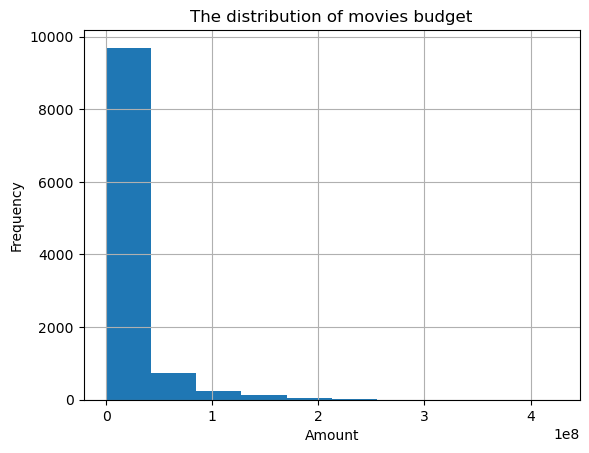

In [145]:
# The distribution of movies budget
df['budget'].hist()
# change the y label
plt.ylabel('Frequency')
# change the x label
plt.xlabel('Amount')
# change the title
plt.title('The distribution of movies budget')
# show the histogram
plt.show()

**As we can see , the distribution of budget is right skewed distribution this means that most movies have small budgets , and few movies have huge budgets**

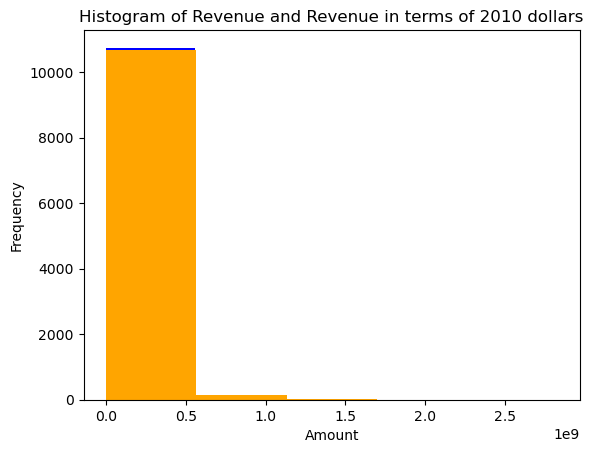

In [149]:
# The distribution of revenue and revenue_adj
plt.hist(df['revenue'], bins=5, label='Revenue', color='blue')
plt.hist(df['revenue_adj'], bins=5, label='Revenue_adj', color='orange')
# # change the x label
plt.xlabel('Amount')
# change the y label
plt.ylabel('Frequency')
# change the title
plt.title('Histogram of Revenue and Revenue in terms of 2010 dollars')
plt.show()

**As we can see there is not a big difference between `revenue` and `revenue_adj`,The distribution of both of them is right skewed distribution(Just like the budget) this  means that most movies have small revenues , and few movies have huge revenues**

**I assumed that the movies with high budget , their budgets must be greater that the 3rd quartile**

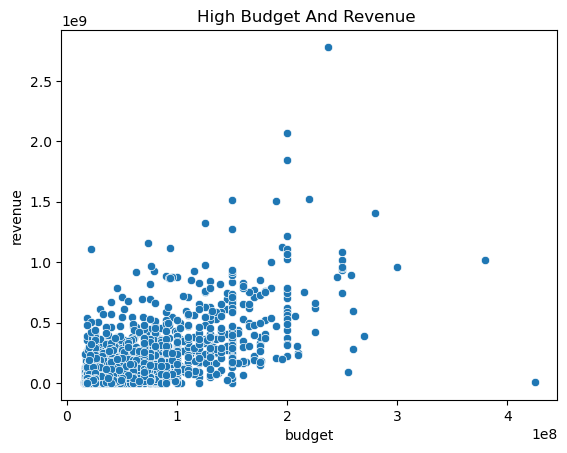

In [152]:
# let's make a data frame for the movies that have a budget more than the 3rd quartile
df_H_budget = df[df['budget']>df['budget'].quantile(0.75)]
# plot the relation between budget and revenue of movies with high bidget
sns.scatterplot(x=df_H_budget['budget'],y=df_H_budget['revenue']);
plt.title('High Budget And Revenue ')
plt.show()

**This suggests a positive correlation between budget and revenue, although it's not a perfect correlation**

Text(0.5, 1.0, 'High budget and revenue in terms of 2010 dollars')

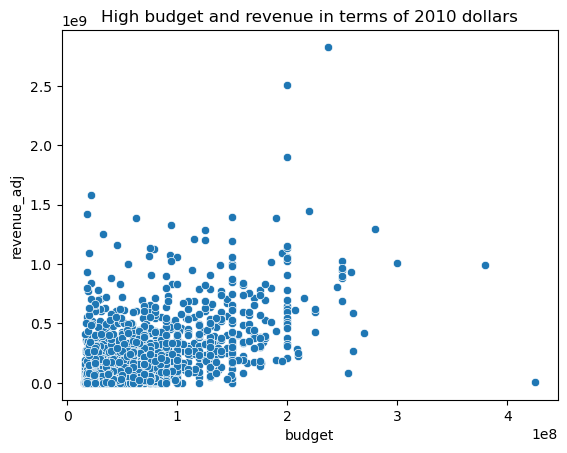

In [154]:
# plot the relation between budget and revenue_adj of movies with high budget
sns.scatterplot(x=df_H_budget['budget'],y=df_H_budget['revenue_adj']);
plt.title('High budget and revenue in terms of 2010 dollars')

**As we can see there is not a big difference between `revenue` and `revenue_adj`, when ploting them with the high budget**
<br>**Both suggest a positive correlation with budget, although it's not a perfect correlation**

### Research Question 2  (Which Year had the highest movies revenues?)

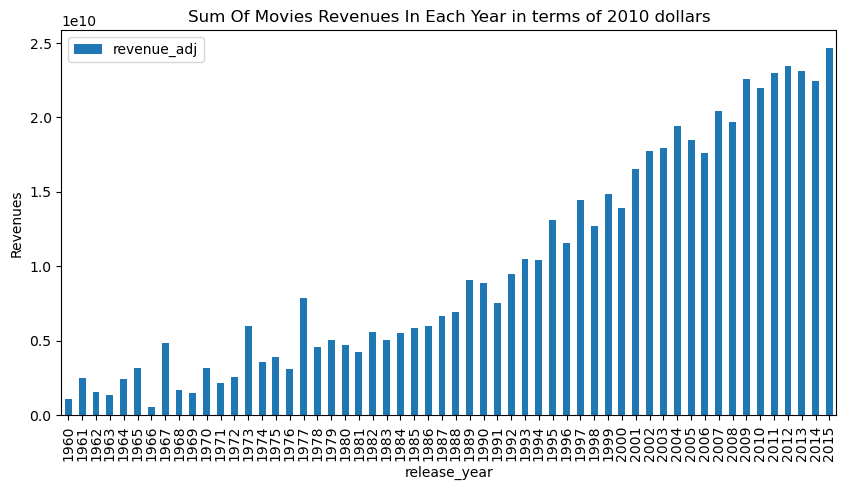

In [157]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate
# make a barplot for the sum of movies in each year
df[['release_year','revenue_adj']].groupby('release_year').sum().plot(kind='bar',figsize=(10,5));
plt.title('Sum Of Movies Revenues In Each Year in terms of 2010 dollars')
plt.ylabel('Revenues')
plt.show()

**As we see every year increases more than the other in the movie's revenues and 2015 had the highest movies revenues**

### Research Question 3 (Which movie in 2015 had the highest revenue? )

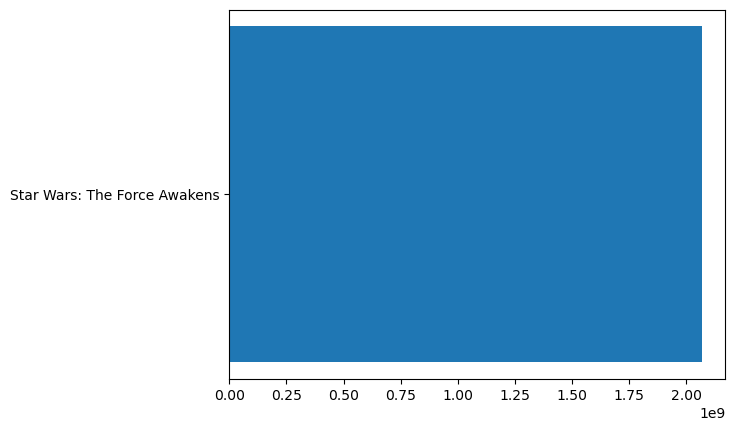

<Figure size 500x500 with 0 Axes>

In [160]:
# make a data frame for movies in 2015
movies_2015 = df[df['release_year']==2015]
highest_revenue_movie = movies_2015[movies_2015['revenue']==np.max(movies_2015['revenue'])]
# plot it
plt.barh(highest_revenue_movie['original_title'],highest_revenue_movie['revenue'])
# change the size of the plot
plt.figure(figsize=(5,5))
# display the plot
plt.show()

**As we can see `Star Wars: The Force Awakens` is the movie that had the highest revenues in `2015`**

<a id='conclusions'></a>
## Conclusions
The analysis of the movie dataset provided valuable insights into various aspects of the film industry, I Answered some questions that I thought 
it help me to know more about movies.
### Limitations
**This dataset contains some challenges:**
<be><li>There were zeros in some columns like, `budget`,`revenue` and `runtime`
<be><li>There were movies with more than one Genre and they were separated by `|` 

**From the Questions that I asked:**
<be><li> We can also say that a high budget may increase the revenue of the movie
<be><li> `2015` had the highest movie revenues
<be><li>`Star Wars: The Force Awakens is the movie that had the highest revenues in `2015`

In [163]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

1